# LUMINER - Tutorials

![](imgs/pipeline3.png)

The end-to-end NER pipeline for information extraction is designed to take user given input and extract a list of entities. The figure above describes how the given text is processed through the pipeline. Following are step-by-step tutorials on running the NER pipeline

___

# Section 0: Installation

## GitHub repository

If you have git installed in the computer you can get the repository by simply opening a terminal window in the folder where you want to save the folder and write

```
git clone https://github.com/Aitslab/NER_pipeline/
```

Alternatively, you can download the repository from github to your designated folder as a zip file:

![](imgs/github.png)

## Installing the conda environment

For running the pipeline, anaconda or miniconda must be installed in the computer. The step-by-step installation instructions can be found on: https://docs.anaconda.com/anaconda/install/index.html.

The necessary packages for running the environment can be installed by opening a conda terminal and writing the following command:

```console
conda env create -f environment.yml
```

After installation the environment should be loaded with:

```console
conda activate env_pipeline
```

If the configuration is set, then all you need to do afterwards is run the main.py file in the terminal:
```console
pyhton main.py
```


___

# Section 0: Config file

All configurations are saved in the config.json file in the github repository. One of the main things to remember is that, if you want to run the pipeline sequentially then options in the ignore section need to be switched to "false".

![ignore_.png](imgs/ignore_.png)
<!-- <div>
<img src="imgs/ignore_.png", width="200"/>
</div> -->

To run the full pipeline sequentially, the following config terms should be set to false, and the rest to true:

1. One of the data loaders depending on the input type (downloader, cord_loader or free_text loader).
2. splitter
3. ner
4. analysis

The following sections will provide more detail on each of these terms

---

# Section 1: Data and Data Loading

The pipeline allows three diffent methods of data loading:

## A. Dataloader with Pubmed IDs

The first section is the data loader that takes pubmed IDs as input and uses an API to retrieve abstracts from pubmed. The articles are then stored in a single JSON file. To run the data loader, turn ignore to false (cord_loader and text_loader to true) and provide the following arguments into the data loader section of the config file

Config file argument:
```console
    input_path: input file path with pubmed IDs
    output_path: output file as document collection
    batch_size: download batch size. Note that, too large of a batch size may invalid download requests.
```
example: 

![downloader_.png](imgs/downloader_.png)

## B. CORD loader

The CORD loader script is tailored specific to the CORD COVID-19 dataset abstracts. The entire abstract is loaded and saved in a similar way to the dataloader script. For the CORD loader to work, the CORD dataset needs to be downloaded and the metadata.csv file path should be provided. To run the CORD loader script, turn ignore to false (and data_loader and text_loader to true) and provide the following arguments:

Config file argument:
```console
    input_path: input file path with CORD-19 metadata.csv file
    output_path: output file as document collection
    subset: true or false - whether a subset of the CORD-19 data is to be extracted.
	subset_file: input file path to a file with cord UIDs if subset option is set to true
```
example: 


![cord_loader_.png](imgs/cord_loader_.png)

## C. Freetext loader

The freetext loader script loads free text from a file. Similar to data_loader and cord_loader, the file path should be provided in the config files.

Config file argument:
```console
    input_path: input file path with free text
    output_path: output file as document collection
    title: Title for the text to be used in the document collection
	id: user given ID for the free text
```
example: 

![text_loader_.png](imgs/text_loader_.png)

___

# Section 2: Sentence Spliter

The loaded text is split with the help of Spacy or NLTK sentencer. The document collection will be split into batches with a specific batch size. How the files should be saved, for example batch size, should be specified in the config file. First you need to set the ignore parameter for splitter to false. Following are the arguments that can be provided to the splitter section

Config file argument:
```console
    input_path: input file path of document collection
    output_folder: output folder path where each bach will be saved
    output_file_prefix: user-set prefix for output files
    tokenizer: "spacy" or "nltk"
    model_name: example: "en_core_web_sm" or "en_core_web_trf" for spacy, for nltk give "" 
	batch_size: number of articles to be saved in one batch

```
example: 

![splitter_.png](attachment:splitter_.png)

___

# Section 3: Named Entity Recognition

In this section the NER models are deployed on split sentences and entities are extracted. To run this section, the ignore argument for ner should be set to false. Then the following config arguments should be provided:

Config file argument:
```console
    input_path: input folder path where all batches of split sentences are located
    output_folder: output folder path where each bach will be saved
    output_file_prefix: user-set prefix for tagged output files
    model_type: type of model, use between "biobert_finetuned" and "spacy_phrasematcher". Note that the latter is dictionary based
    model_folder: folder where model(s) are located
    model_name: name of the model within the model folder
    vocab_path: if a specific vocab file is provided, used for dictionary based tagging (spacy_phrasematcher)
    store_tokens:"no",
    labels: if specific lavels are to be provided. ex: ["[PAD]", "B", "I", "O", "X", "[CLS]", "[SEP]"],
    clear_old_results: overwrite old results
    article_limit: if user decides to only choose a range of articles to run the model on, default [-1,9000]
	entity_type: type of extracted entity
```
example: 

![ner_.png](attachment:ner_.png)


_____

# Section 4: Analysis

This section uses the extracted entities to generate a file of ranked entities and frequency plots. First, as all the other steps above, set ignore analysis to false. Then use the following input and output config arguments:

Config file argument:
```console
    input_path: input folder path where all batches of NER are located
    output_path: output folder path where the analysis files will be saved
```
example: 

![Analysis_.png](attachment:Analysis_.png)

output:

1. File with ranked entity list

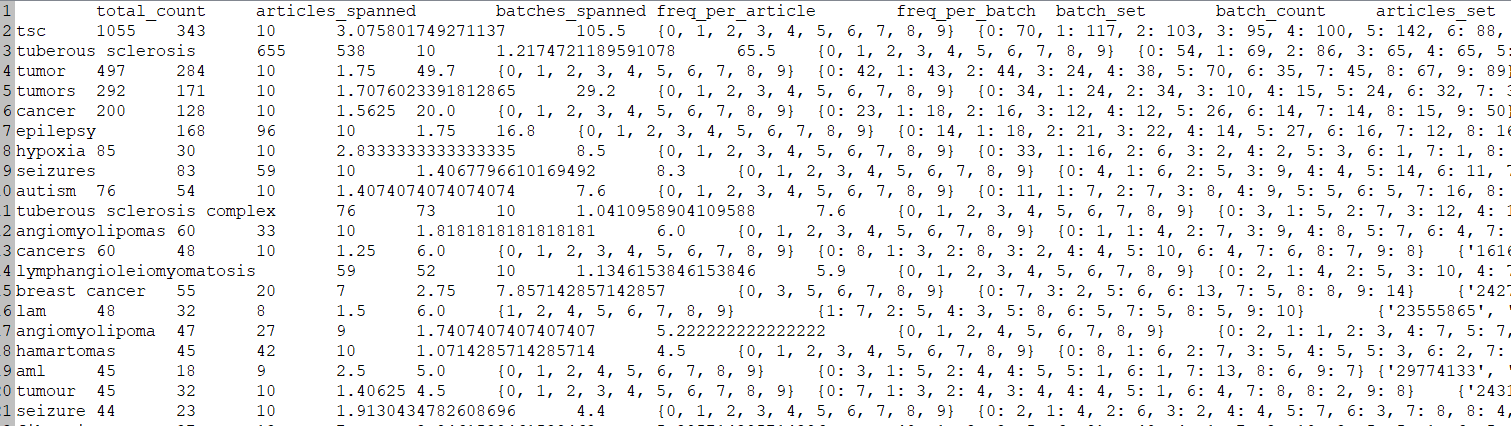

2. Bar graph of frequencies:

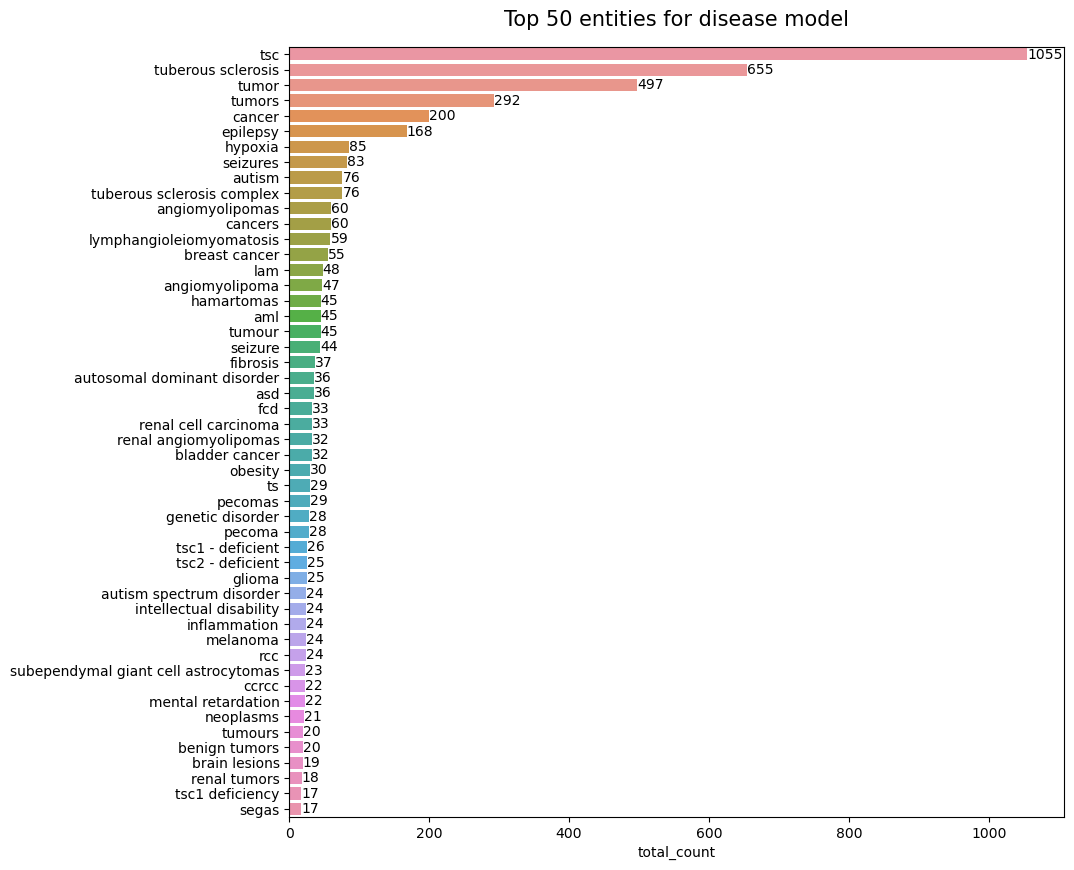

_____

# Section 5: Merger (optional)

The merger section combines results from multiple models into a single file for analysis. First, as all the other steps above, set ignore analysis to false. Then use the following input and output config arguments:

Config file argument:
```console
    input_paths: list of input folder path where the files are saved. for example: ["path/to/cell/model/files1/", "path/to/chemical/model/files2/", "path/to/disease/model/files3/"]
    
    entities: list of entities correcponding to the models. For example: ["cell", "chemical", "disease"]
    output_path: output path where the medged file will be saved
```
